# HEALPix Python Project

Author: Yannick Hénin
University of Strasbourg

First we import our python module

In [1]:
from moc_library import Loader, Moc_tree

We define useful constant in this cell such as:
- name of the catalogue to query
- max number of elements in the table
- order of the initial healpix cell

In [2]:
CATALOGUE = 'II/7A/catalog'
OUT_MAX = 10000
ORDER = 8

The library is built using the astropy library, it is hence able to query the table from Vizier easily. 
This step is made by the Loader class which has only two methods:
- get_votable() : Allow one to get the votable
- build_healpix_table() : Construct a healpix column from (ra,dec) and add it to the table

Let's first query the catalogue and have a look at the table queried.

In [3]:
loader = Loader(_catalogue=CATALOGUE, _out_max=OUT_MAX, _order=ORDER)
votable = loader.get_votable()
print(votable)

Querying: 'II/7A/catalog' from Vizier
Coordinate system of the table: eq_FK5, J2000

recno JP11     LID     n_LID   U    ...  N    H    ref     _RA       _DE   
                              mag   ... mag  mag           deg       deg   
----- ---- ----------- ----- ------ ... --- ------ ---- --------- ---------
    1    1  0.00000444           -- ...  --  6.640 8130  40.17863   1.19868
    2    1  0.00000444           -- ...  --  6.640 8130  40.17863   1.19868
    3    3  0.00004030       15.340 ...  --  4.100 8057 282.60583   0.79167
    4    4  0.00004064       13.570 ...  --  2.390 8057 284.38983   0.45552
    5    5  0.00101522           -- ...  --  6.280 8140 102.08778   1.21897
    6    5  0.00101522           -- ...  --  6.320 8140 102.08778   1.21897
    7    7  0.00102447       12.340 ...  --     -- 8008 157.23146   0.84100
    8    7  0.00102447       12.370 ...  --  5.640 8075 157.23146   0.84100
    9    7  0.00102447           -- ...  --  5.600 8130 157.23146   0.84100
   

Let's now add the HEALPix column to this VOTable. <br>
**Note:** The _build_healpix_table()_ method sorts the table and removes the duplicated lines in the healpix table automatically to avoid overlapping problems in the future. 
To avoid this, one can specify whether to do it or not with the argument *_rm_duplicates*.


In [4]:
healpix_table = loader.build_healpix_table(votable)
print(healpix_table)

Removed 2435 duplicates.

recno JP11     LID     n_LID   U    ...   H    ref     _RA       _DE    HEALPix
                              mag   ...  mag           deg       deg           
----- ---- ----------- ----- ------ ... ------ ---- --------- --------- -------
  751  751  1.00019305           -- ...  5.770 8149  46.61140   1.96517      77
  737  737  1.00018884           -- ...     -- 8002  45.56988   4.08973     245
 5938 5938  9.80077031           -- ...  8.100 8130  48.34167   4.77167     361
  735  735  1.00018832        7.890 ...     -- 8083  45.46793   5.33615     773
  745  745  1.00019019        7.240 ...     -- 8083  45.96173   6.13330     791
  731  731  1.00018604        4.130 ...     -- 8029  44.92876   8.90736    1011
 4767 4767  5.20250001        8.090 ...     -- 8039  49.35995   7.65581    1203
 4768 4768  5.20250002        8.560 ...     -- 8039  49.38659   7.69015    1206
  769  769  1.00020665        7.350 ...     -- 8083  49.98341   8.69977    1261
  779  779  1.

In [5]:
print(healpix_table[:3])
print('______________________________________________________________________________________')
print(loader.build_healpix_table(votable[:3], _rm_duplicates=False))

recno JP11     LID     n_LID  U   B  ...   H    ref     _RA       _DE    HEALPix
                             mag mag ...  mag           deg       deg           
----- ---- ----------- ----- --- --- ... ------ ---- --------- --------- -------
  751  751  1.00019305        --  -- ...  5.770 8149  46.61140   1.96517      77
  737  737  1.00018884        --  -- ...     -- 8002  45.56988   4.08973     245
 5938 5938  9.80077031        --  -- ...  8.100 8130  48.34167   4.77167     361
______________________________________________________________________________________
Duplicates were not removed.

recno JP11     LID     n_LID   U    ...   H    ref     _RA       _DE    HEALPix
                              mag   ...  mag           deg       deg           
----- ---- ----------- ----- ------ ... ------ ---- --------- --------- -------
    1    1  0.00000444           -- ...  6.640 8130  40.17863   1.19868  284438
    2    1  0.00000444           -- ...  6.640 8130  40.17863   1.19868  2844

Some lines seem indeed to be duplicated in the second table.

Now that we have our Table well-prepared, one can continue by creating a MOC tree. This is done by the Moc_tree class. <br>

This class has 4 methods:
- _build_moc_tree()_ : create the tree with from a HEALPix table
- _serialize_moc()_ : return the serialized moc tree
- _add_node()_ : add a node to a given order in the tree
- _del_nodes()_ : remove different nodes from a given order in the tree

Let's now build our Moc_tree.

In [6]:
moc_tree = Moc_tree(ORDER)
print(moc_tree.nodes)

{8: []}


There is nothing but the order in the nodes yet.

In [7]:
# Automatically raises an error if the wrong table is given
moc_tree.build_moc_tree(votable)

AssertionError: No HEALPix column in the given table. Please build it before using this method

In [8]:
moc_tree.build_moc_tree(healpix_table)
print(moc_tree.nodes)

{8: [77, 245, 361, 773, 791, 1011, 1203, 1206, 1261, 1269, 1447, 1934, 2059, 2196, 2485, 2585, 2837, 3447, 4075, 4642, 4949, 4958, 5132, 5157, 5205, 5340, 5382, 5404, 5413, 5428, 5447, 5453, 5460, 5463, 5478, 5479, 5480, 5491, 5571, 5596, 5604, 5612, 5628, 5653, 5755, 5974, 6004, 6044, 6429, 6581, 6709, 6849, 6877, 7219, 7270, 7282, 7288, 7296, 7306, 7311, 7312, 7341, 7353, 7360, 7366, 7367, 7371, 7375, 7378, 7381, 7382, 7389, 7390, 7391, 7392, 7396, 7399, 7403, 7410, 7411, 7416, 7417, 7424, 7439, 7477, 7554, 7555, 7556, 7558, 7566, 7567, 7577, 7578, 7588, 7591, 7597, 7598, 7601, 7602, 7610, 7612, 7614, 7631, 7639, 7651, 7659, 7707, 7730, 7741, 7792, 7798, 7940, 7943, 7944, 7947, 7952, 7960, 8738, 8971, 10664, 10951, 11033, 11614, 11804, 11904, 12056, 12326, 12345, 12783, 12983, 13226, 13549, 14313, 14451, 14649, 14673, 15611, 15968, 16240, 16290, 16331, 16385, 16390, 16517, 16521, 16527, 16529, 16539, 16561, 16567, 16651, 16653, 16675, 16677, 16682, 16691, 16732, 16939, 16974, 17171, 

The tree is built. Let's have a look at th serialization of the tree

In [9]:
print(moc_tree.serialize_moc())

7/1846 1853 1855 1890 1896 1898 1941 1984 14418 18787 18792 18793 18795 18798 18881 58769 58771 58772 85746 85755 85758 91220 91223 94550 132379 169857 
8/77 245 361 773 791 1011 1203 1206 1261 1269 1447 1934 2059 2196 2485 2585 2837 3447 4075 4642 4949 4958 5132 5157 5205 5340 5382 5404 5413 5428 5447 5453 5460 5463 5478 5479 5480 5491 5571 5596 5604 5612 5628 5653 5755 5974 6004 6044 6429 6581 6709 6849 6877 7219 7270 7282 7288 7296 7306 7311 7312 7341 7353 7360 7366 7367 7371 7375 7378 7381 7382 7389 7390 7391 7392 7396 7399 7403 7410 7411 7416 7417 7424 7439 7477 7554 7555 7556 7558 7566 7567 7577 7578 7588 7591 7597 7598 7601 7602 7610 7612 7614 7631 7639 7651 7659 7707 7730 7741 7792 7798 7940 7943 7944 7947 7952 7960 8738 8971 10664 10951 11033 11614 11804 11904 12056 12326 12345 12783 12983 13226 13549 14313 14451 14649 14673 15611 15968 16240 16290 16331 16385 16390 16517 16521 16527 16529 16539 16561 16567 16651 16653 16675 16677 16682 16691 16732 16939 16974 17171 17187 1719

### Comparison of the results
Now that we have serialized our moc tree, let's compare the results of our custom MOC library with the official mocpy library

In [10]:
from mocpy import MOC

# A MOC object can be obtained from our serialization using MOC.from_string()
custom_moc = MOC.from_string(moc_tree.serialize_moc())

print(custom_moc)

7/1846 1853 1855 1890 1896 1898 1941 1984 14418 18787 18792-18793 18795 18798 
 18881 58769 58771-58772 85746 85755 85758 91220 91223 94550 132379 169857 
8/77 245 361 773 791 1011 1203 1206 1261 1269 1447 1934 2059 2196 2485 2585 
 2837 3447 4075 4642 4949 4958 5132 5157 5205 5340 5382 5404 5413 5428 5447 
 5453 5460 5463 5478-5480 5491 5571 5596 5604 5612 5628 5653 5755 5974 6004 
 6044 6429 6581 6709 6849 6877 7219 7270 7282 7288 7296 7306 7311-7312 7341 
 7353 7360 7366-7367 7371 7375 7378 7381-7382 7389-7392 7396 7399 7403 
 7410-7411 7416-7417 7424 7439 7477 7554-7556 7558 7566-7567 7577-7578 7588 
 7591 7597-7598 7601-7602 7610 7612 7614 7631 7639 7651 7659 7707 7730 7741 
 7792 7798 7940 7943-7944 7947 7952 7960 8738 8971 10664 10951 11033 11614 
 11804 11904 12056 12326 12345 12783 12983 13226 13549 14313 14451 14649 14673 
 15611 15968 16240 16290 16331 16385 16390 16517 16521 16527 16529 16539 16561 
 16567 16651 16653 16675 16677 16682 16691 16732 16939 16974 17171 17187 17

In [16]:
# One can query the table using the mocpy library as well
moc = MOC.from_vizier_table(table_id=CATALOGUE, nside=2**ORDER)

print(custom_moc == moc)

False


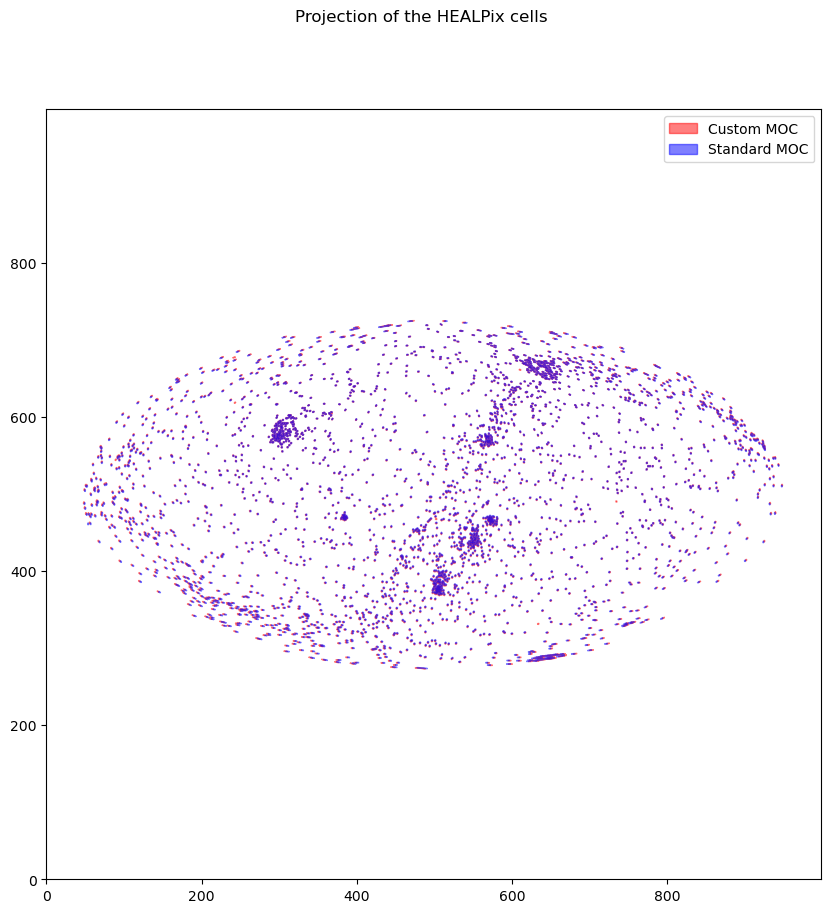

In [15]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the custom MOC in red and the standard MOC in blue
custom_moc.fill(ax, custom_moc.wcs(fig), color="red", alpha=0.5, label="Custom MOC")
moc.fill(ax, moc.wcs(fig), color="blue", alpha=0.5, label="Standard MOC")

plt.suptitle("Projection of the HEALPix cells")
plt.legend()
plt.show()

One can see some outliers unfortunately but the major cells are overlapping correctly